In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../data/fashion-mnist_train.csv")
df_test = pd.read_csv("../data/fashion-mnist_test.csv")

# Separate features and labels

In [3]:
X_train = df_train.drop(columns=['label']).values  # shape is (60000, 784)
y_train = df_train['label'].values

X_test = df_test.drop(columns=['label']).values
y_test = df_test['label'].values

X_train = X_train / 255.0 # we can normalise 
X_test = X_test / 255.0

# Investigate how much of the dataset's variance is explained by each principal component
* We will use this information to select an ideal number of principal components; Ideally where the curve levels off or where we explain 95% variance
* We can extract up to 784 principal components

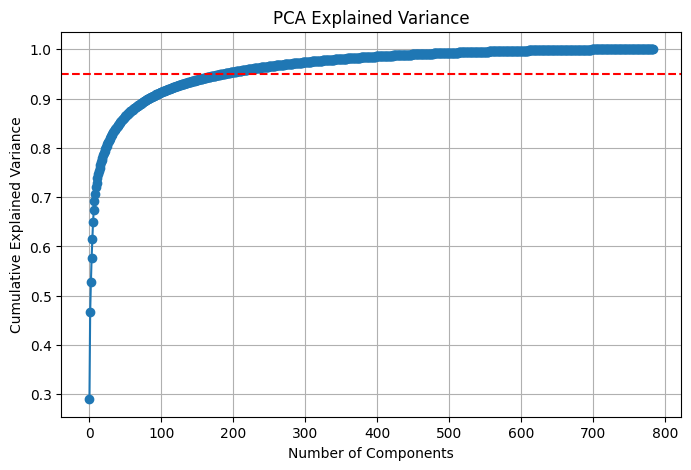

np.int64(186)

In [5]:
pca = PCA().fit(X_train)  # We still need to run full PCA of course
explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('PCA Explained Variance')
plt.show()

np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95)

Apparently the first ~100 components carry ~91% of the information, and 186 components can explain 95% of the variance. Elbow point starts around 80 components.

100 components could be used for speed/practical use, still captures 90% of information
186 components is the statistically ideal number to reduce information loss

In [7]:
pca = PCA(n_components=186)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Use same transformation

In [11]:
# can try visualising but it doesnt give much info
# pca_vis = PCA(n_components=186)
# X_vis = pca_vis.fit_transform(X_train)

# plt.figure(figsize=(8,6))
# scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap='tab10', alpha=0.5)
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.title("Fashion MNIST PCA (2D)")
# plt.xlabel("PC 1")
# plt.ylabel("PC 2")
# plt.grid(True)
# plt.show()

# Save PCA/dimension-reduced data for use in other basic ML models

In [16]:
X_train_pca_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_pca_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Save them for use in SVM.py
torch.save((X_train_pca_tensor, y_train_tensor), "train_tensors.pt")
torch.save((X_test_pca_tensor, y_test_tensor), "test_tensors.pt")